<a href="https://colab.research.google.com/github/thanaphornkanking/BSC_DPDM23/blob/main/Internet_usage_behavior_in_Thailand_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Internet usage behavior in Thailand

Link to Data: https://data.go.th/dataset/dataset_25_02?fbclid=IwAR3fip4rhRVHIEnfSP00ox2DddICf_dKYy1hheuEcg5v7IfC4cFJ575Ir_c

Link Data เพิ่มเติม : https://opendata.etda.or.th/eu/dataset/dataset_25_02/resource/fb003566-bfe7-44df-979a-21fd68e9554d?fbclid=IwAR3RYnBtg3tlRhOMQHbDGyVVqw-kqjNjA5N-FnVKg7623era1MtV0bzN1mE

### แบบสอบถาม 18 ข้อ ที่ใช้ในชุดข้อมูล



- ท่านเคยพบเห็นข่าวปลอม (Fake News) บนโลกออนไลน์หรือไม่

- ใช้ Social Media เช่น Facebook, Twitter, Instagram

- ใช้แอปพลิเคชันถ่ายทอดสด เช่น Facebook Live, Instagram Live ,YouTube live

- เล่นเกมออนไลน์

- รับ-ส่งอีเมล

- ค้นหาข้อมูล (Search Engine) เช่น ค้นหาข้อมูลใน Google/Bing

- เรียนออนไลน์ (e-Learning)

- หางาน/สมัครงานทางออนไลน์

- ซื้อขายสินทรัพย์เพื่อการลงทุน เช่น หุ้น กองทุนรวม

- ติดต่อสื่อสารออนไลน์ ทั้งการโทรศัพท์ และพูดคุย (Chat)

- ขายสินค้าและบริการออนไลน์

- ดาวน์โหลดซอฟต์แวร์/เพลง/ละคร/ภาพยนตร์/เกม/ไอเทมในเกม

- ซื้อสินค้าและบริการออนไลน์

- ดูโทรทัศน์/ดูคลิป/ดูหนัง/ฟังเพลงออนไลน์

- อ่านข่าว/บทความ/หนังสืออิเล็กทรอนิกส์ (e-Book)

- ทำธุรกรรมทางการเงินออนไลน์

- ใช้งานบริการภาครัฐผ่านระบบออนไลน์ เช่น ชำระภาษีออนไลน์

- ทำงานผ่านระบบออนไลน์ ประชุมออนไลน์

- ซื้อประกันออนไลน์ เช่น ประกันCOVID19 ประกันสุขภาพ ประกันอุบัติเหตุ ฯลฯ

In [ ]:
# !pip install scikit-learn==1.4.0


In [ ]:
!pip show tensorflow
!pip show keras
!pip show scikit-learn

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl
Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow
Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: n

# Connect drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Necessary Imports

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Read, Prepare and Clean Data

In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/Shareddrives/Internet Behavior/raw-data-iub-2563.xlsx')

df.head()

,fake_news,online_acitivity_1,online_acitivity_2,online_acitivity_3,online_acitivity_4,online_acitivity_5,online_acitivity_6,online_acitivity_7,online_acitivity_8,online_acitivity_9,online_acitivity_10,online_acitivity_11,online_acitivity_12,online_acitivity_13,online_acitivity_14,online_acitivity_15,online_acitivity_16,online_acitivity_17,online_acitivity_18
0,2,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,0,0
1,2,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
2,2,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0
3,2,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,0
4,2,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0


- ตรวจสอบค่าที่ไม่ใช่ตัวเลขในข้อมูล

In [ ]:
non_numeric_values = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum()

print(non_numeric_values)

fake_news              0
online_acitivity_1     0
online_acitivity_2     0
online_acitivity_3     0
online_acitivity_4     0
online_acitivity_5     0
online_acitivity_6     0
online_acitivity_7     0
online_acitivity_8     0
online_acitivity_9     0
online_acitivity_10    0
online_acitivity_11    0
online_acitivity_12    0
online_acitivity_13    0
online_acitivity_14    0
online_acitivity_15    0
online_acitivity_16    0
online_acitivity_17    0
online_acitivity_18    1
dtype: int64


- ลบ row ไม่ใช่ตัวเลข (เนื่องจากมีข้อมูลที่ผิดปกติไม่เกิน 5% ของข้อมูลทั้งหมด)

In [ ]:
non_numeric_rows = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().any(axis=1)
numeric_df = df[~non_numeric_rows]
numeric_df

,fake_news,online_acitivity_1,online_acitivity_2,online_acitivity_3,online_acitivity_4,online_acitivity_5,online_acitivity_6,online_acitivity_7,online_acitivity_8,online_acitivity_9,online_acitivity_10,online_acitivity_11,online_acitivity_12,online_acitivity_13,online_acitivity_14,online_acitivity_15,online_acitivity_16,online_acitivity_17,online_acitivity_18
0,2,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,0,0
1,2,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
2,2,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0
3,2,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,0
4,2,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21644,2,1,1,0,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1
21645,2,1,0,0,1,1,0,1,0,1,0,1,1,1,1,1,0,0,0
21646,2,1,0,1,0,1,1,0,0,1,0,0,1,1,1,1,0,0,0
21647,2,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0


- ตรวจสอบค่าผิดปกติอีกครั้ง

In [ ]:
non_numeric_values = numeric_df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum()

print(non_numeric_values)

fake_news              0
online_acitivity_1     0
online_acitivity_2     0
online_acitivity_3     0
online_acitivity_4     0
online_acitivity_5     0
online_acitivity_6     0
online_acitivity_7     0
online_acitivity_8     0
online_acitivity_9     0
online_acitivity_10    0
online_acitivity_11    0
online_acitivity_12    0
online_acitivity_13    0
online_acitivity_14    0
online_acitivity_15    0
online_acitivity_16    0
online_acitivity_17    0
online_acitivity_18    0
dtype: int64


- หาค่า missing value จากข้อมูลทั้งหมด

In [ ]:
null_values = numeric_df.isnull().sum()

print(null_values)

fake_news              0
online_acitivity_1     0
online_acitivity_2     0
online_acitivity_3     0
online_acitivity_4     0
online_acitivity_5     0
online_acitivity_6     0
online_acitivity_7     0
online_acitivity_8     0
online_acitivity_9     0
online_acitivity_10    0
online_acitivity_11    0
online_acitivity_12    0
online_acitivity_13    0
online_acitivity_14    0
online_acitivity_15    0
online_acitivity_16    0
online_acitivity_17    0
online_acitivity_18    0
dtype: int64


In [ ]:
data = numeric_df.copy()

# Data Visualization

<ipython-input-14-b0c9d91844b6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = data.corr()


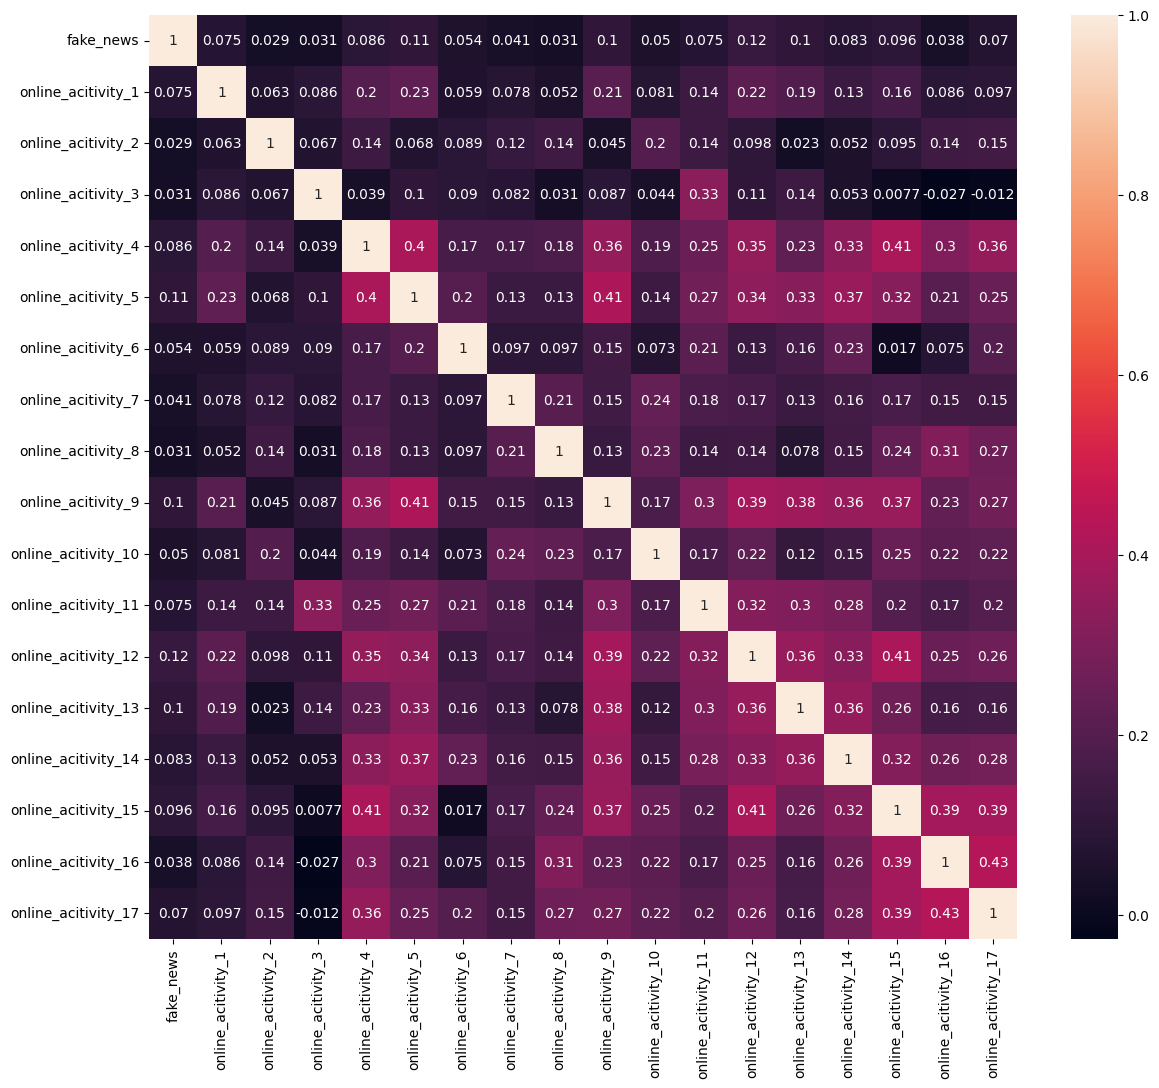

In [ ]:
plt.figure(figsize=(14,12))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# กำหนด Features และ Target varible (X,y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Features (X)
X = data.drop(columns=['fake_news'])  # คอลัมน์กิจกรรมออนไลน์ทั้งหมด

# Target variable (y)
y = data['fake_news']  # เลือกคอลัมน์ 'fake_news' เป็นตัวแปรเป้าหมาย


# แบ่งชุดข้อมูล

In [ ]:
X_train_cost, X_test_cost, y_train_cost, y_test_cost = train_test_split(X, y, test_size = 0.2)

print(f"Shape of X_train is: {X_train_cost.shape}")
print(f"Shape of Y_train is: {y_train_cost.shape}\n")
print(f"Shape of X_test is: {X_test_cost.shape}")
print(f"Shape of Y_test is: {y_test_cost.shape}\n")


Shape of X_train is: (17318, 18)
Shape of Y_train is: (17318,)

Shape of X_test is: (4330, 18)
Shape of Y_test is: (4330,)



# การเตรียมข้อมูล ฝึก Model และประเมิน Model

In [ ]:
# แทนที่ '2' ด้วย '1' และ '1' ด้วย '0' ในคลาส เพราะ Cost-sensitive Learning ต้องใช้ตัวเลขที่เป็นไบนารีเท่านั้น หรือ 0 , 1
y_train_binary = y_train_cost.replace({2: 1, 1: 0})
y_test_binary = y_test_cost.replace({2: 1, 1: 0})

# ปรับน้ำหนัก โมเดลจะให้ความสำคัญกับคลาสที่มีค่าเป็น 1 มากกว่าคลาสที่มีค่าเป็น 0
class_weights = {0: 1, 1: 10}  # คลาสที่มีค่าเป็น 0 จะมีค่าน้ำหนักเท่ากับ 1 คลาสที่มีค่าเป็น 1 จะมีค่าน้ำหนักเท่ากับ 10

# Train  model
tree = DecisionTreeClassifier(random_state=0, class_weight=class_weights,max_depth= 3, min_samples_leaf= 1, min_samples_split= 2)
tree.fit(X_train_cost, y_train_binary)

# Predict test set
y_pred = tree.predict(X_test_cost)

# ประเมิน model
accuracy = accuracy_score(y_test_binary, y_pred)
precision = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)
f1 = f1_score(y_test_binary, y_pred)

# แสดงค่าประสิทธิภาพของโมเดล
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision:, {precision:.4f}")
print(f"Recall:, {recall:.4f}")
print(f"F1 Score:, {f1:.4f}")


Accuracy: 0.9517
Precision:, 0.9517
Recall:, 1.0000
F1 Score:, 0.9753


In [ ]:
from sklearn.metrics import classification_report

# แสดง Classification Report
print(classification_report(y_test_binary, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       209
           1       0.95      1.00      0.98      4121

    accuracy                           0.95      4330
   macro avg       0.48      0.50      0.49      4330
weighted avg       0.91      0.95      0.93      4330



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Create file model

# Neural Model

In [ ]:
# 1. Data Preparation
X = data.drop(columns=['fake_news'])
y = data['fake_news']
# Assuming y is a pandas Series
y = y.replace({1: 0, 2: 1})

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Architecture
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer

# 4. Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Model Training
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 6. Model Evaluation
y_pred = model.predict_classes(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

# Fitting model